In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [4]:
data = df.iloc[:, :-1]
labels = df.iloc[:, -1]

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456


In [6]:
labels.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: 140, dtype: float64

In [7]:
print(f'shape of data: {data.shape}')
print(f'shape of labels: {labels.shape}')

shape of data: (4998, 140)
shape of labels: (4998,)


In [9]:
normal_data = data[labels == 1]
normal_label = labels[labels == 1]

In [10]:
abnormal_data = data[labels == 0]
abnormal_label = labels[labels == 0]

In [11]:
normal_data.head()

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456


In [12]:
normal_label.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: 140, dtype: float64

In [13]:
abnormal_data.head()

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
292,-0.032245,-0.545050,-0.822340,-1.605085,-1.805775,-2.008067,-2.233975,-2.191458,-2.058071,-1.880849,...,-0.906425,-1.621376,-2.329090,-3.049894,-3.620413,-4.210482,-4.043785,-3.051813,-2.806866,-0.879666
293,-0.003377,-0.279265,-0.230519,-0.635978,-0.894795,-1.023105,-1.243738,-1.458372,-1.677896,-1.784530,...,-2.155969,-2.640508,-3.218384,-3.651630,-3.881198,-3.924672,-3.164390,-2.228373,-1.837544,-0.378489
294,0.195989,-0.222258,-0.754773,-1.415614,-1.775851,-2.162326,-2.467492,-2.331384,-1.993476,-1.611709,...,-0.162438,-0.935030,-1.654340,-2.434240,-3.472170,-4.280780,-4.629438,-3.794192,-2.851468,-1.743521
295,0.894867,-0.003822,-0.751052,-1.396543,-1.737838,-2.113020,-2.213210,-2.203347,-2.024191,-1.591458,...,-0.899746,-1.441516,-1.861612,-2.321381,-2.884877,-3.530246,-4.412515,-3.903331,-3.567106,-1.536338
296,1.250060,0.760800,0.042925,-0.627974,-0.963454,-1.261335,-1.652440,-1.888433,-1.935217,-1.808429,...,-0.695282,-0.979223,-1.353969,-1.952051,-2.640386,-3.000281,-3.812490,-3.973360,-5.221946,-3.661793


In [14]:
abnormal_label.head()

292    0.0
293    0.0
294    0.0
295    0.0
296    0.0
Name: 140, dtype: float64

In [15]:
print(f'shape of normal data: {normal_data.shape}')
print(f'shape of normal label: {normal_label.shape}')

shape of normal data: (2919, 140)
shape of normal label: (2919,)


In [16]:
print(f'shape of abnormal data: {abnormal_data.shape}')
print(f'shape of abnormal label: {abnormal_label.shape}')

shape of abnormal data: (2079, 140)
shape of abnormal label: (2079,)


In [17]:
x_train, x_test, y_train, y_test = train_test_split(normal_data, normal_label, test_size=0.2, random_state=42)

In [18]:
min = x_train.min()
max = x_train.max()

x_train_norm = (x_train - min) / (max - min)
x_test_norm = (x_test - min) / (max - min)

In [19]:
x_train_float = x_train_norm.astype('float32')
x_test_float = x_test_norm.astype('float32')

In [20]:
x_train_float.shape

(2335, 140)

In [21]:
x_test_float.shape

(584, 140)

In [28]:
abnormal_data_norm = (abnormal_data - abnormal_data.min()) / (abnormal_data.max() - abnormal_data.min())
abnormal_data_float = abnormal_data_norm.astype('float32')

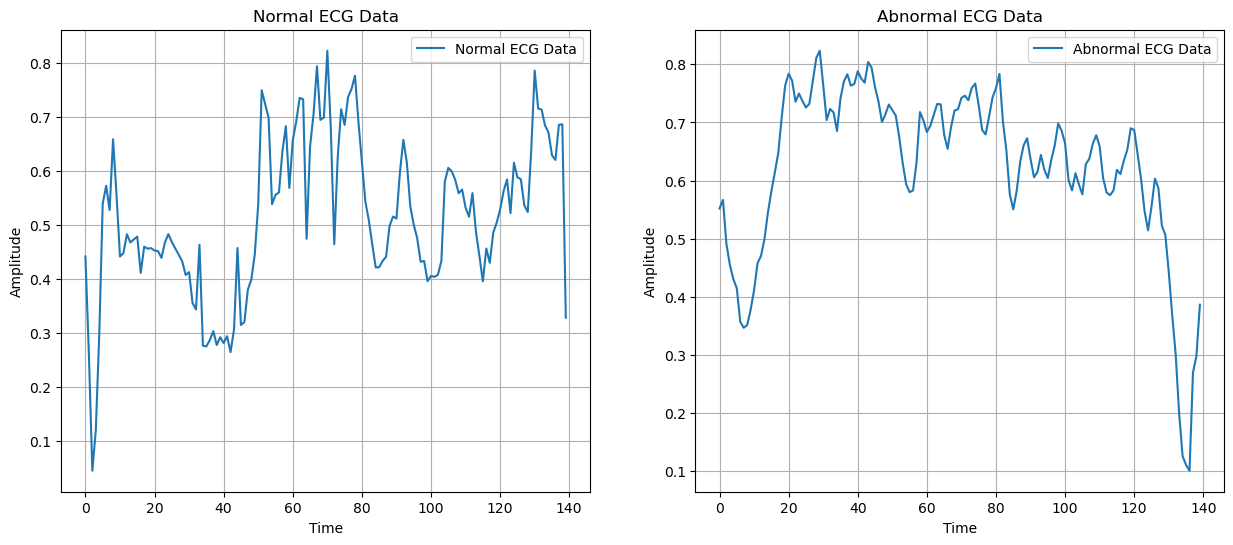

In [36]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2, 1)
plt.grid()
plt.plot(x_train_float.iloc[0, :], label='Normal ECG Data')
plt.title('Normal ECG Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(1,2, 2)
plt.grid()
plt.plot(abnormal_data_float.iloc[0, :], label='Abnormal ECG Data')
plt.title('Abnormal ECG Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [39]:
input = tf.keras.layers.Input(shape=(140,))

encoder = tf.keras.layers.Dense(64, activation='relu')(input)
encoder = tf.keras.layers.Dense(32, activation='relu')(encoder)
encoder = tf.keras.layers.Dense(16, activation='relu')(encoder)

decoder = tf.keras.layers.Dense(32, activation='relu')(encoder)
decoder = tf.keras.layers.Dense(64, activation='relu')(decoder)
decoder = tf.keras.layers.Dense(140, activation='sigmoid')(decoder)

In [40]:
model = tf.keras.models.Model(inputs=input, outputs=decoder)

In [41]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 140)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         9,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 140)            │         9,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,388 (91.36 KB)

 Trainable params: 23,388 (91.36 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [46]:
history = model.fit(x_train_float, x_train_float, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0031 - mae: 0.0376 - val_loss: 0.0031 - val_mae: 0.0380
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0029 - mae: 0.0362 - val_loss: 0.0029 - val_mae: 0.0368
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0029 - mae: 0.0361 - val_loss: 0.0029 - val_mae: 0.0361
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0028 - mae: 0.0355 - val_loss: 0.0028 - val_mae: 0.0359
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0028 - mae: 0.0355 - val_loss: 0.0028 - val_mae: 0.0362
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0025 - mae: 0.0344 - val_loss: 0.0026 - val_mae: 0.0347
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024 - mae: 0.0330 - val_loss: 0.0026 - val_mae: 0.0344
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024 - mae: 0.0333 - val_loss: 0.0025 - val_mae: 0.0340
Epoch 9/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0023 - mae: 

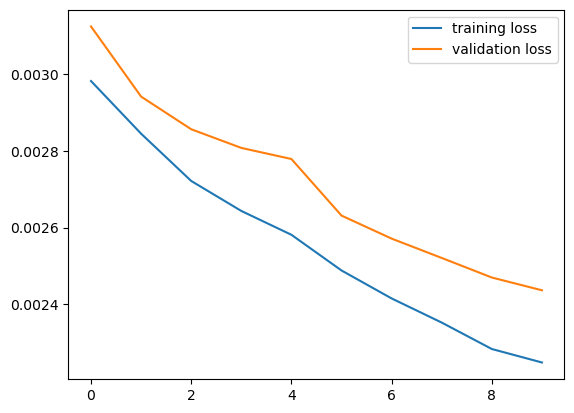

In [49]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

In [63]:
normal_test = model.predict(x_test_float)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [64]:
abnormal_test = model.predict(abnormal_data_float)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


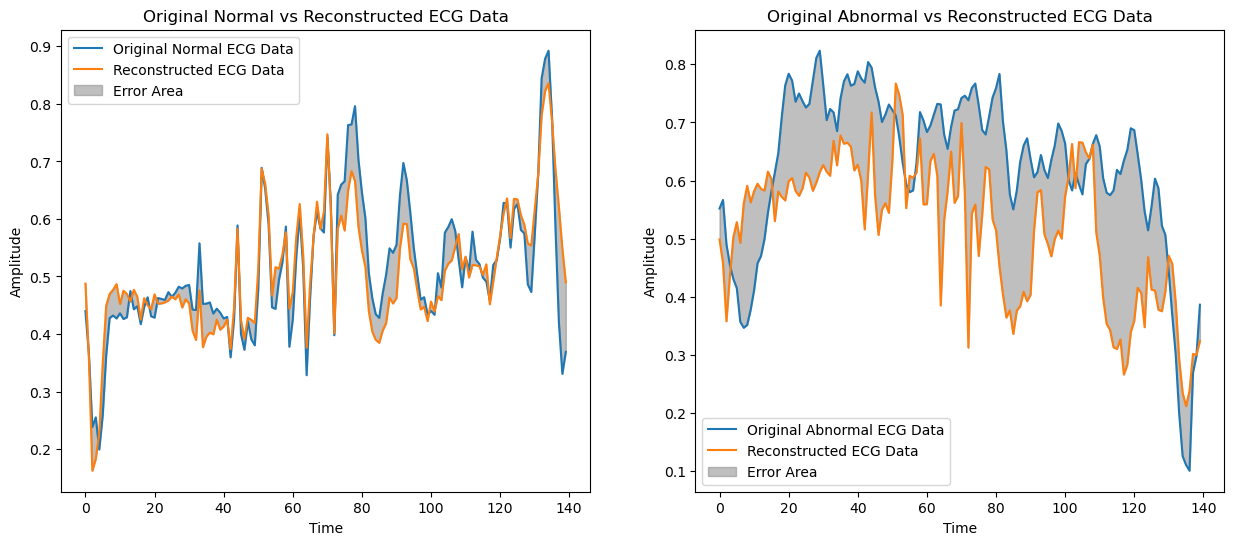

In [65]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(x_test_float.iloc[0, :], label='Original Normal ECG Data')
plt.plot(normal_test[0], label='Reconstructed ECG Data')
plt.fill_between(range(140), x_test_float.iloc[0, :], normal_test[0], color='gray', alpha=0.5, label='Error Area')
plt.title('Original Normal vs Reconstructed ECG Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(abnormal_data_float.iloc[0, :], label='Original Abnormal ECG Data')
plt.plot(abnormal_test[1], label='Reconstructed ECG Data')
plt.fill_between(range(140), abnormal_data_float.iloc[0, :], abnormal_test[1], color='gray', alpha=0.5, label='Error Area')
plt.title('Original Abnormal vs Reconstructed ECG Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [45]:
# Evaluate the model on the test dataset
loss, mae = model.evaluate(x_test_float, x_test_float, verbose=1)

# Print the performance metrics
print(f"Test Loss: {loss}")
print(f"Test Mean Absolute Error (MAE): {mae}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0029 - mae: 0.0371 
Test Loss: 0.002997572300955653
Test Mean Absolute Error (MAE): 0.037065327167510986


In [66]:
loss, mae = model.evaluate(abnormal_data_float, abnormal_data_float, verbose=1)

# Print the performance metrics
print(f"Test Loss: {loss}")
print(f"Test Mean Absolute Error (MAE): {mae}")

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0304 - mae: 0.1502  
Test Loss: 0.030089806765317917
Test Mean Absolute Error (MAE): 0.14922872185707092
